In [1]:
import pandas as pd

#NYC School Survery Import (HSS): 
RespRate = pd.read_excel("2016 NYC School Survey Public Data.xlsx",sheetname = 0)

#High Schools At a Glance Import (HSAAG): 
schools = pd.read_csv('HSAAG_data/HSAAG_Schools.csv', encoding='latin-1',header=0)

#Demographics:
dem_school = pd.read_excel("DemographicSnapshot201112to201516Public_FINAL.xlsx",sheetname=3)




In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

 
# HSAAG - Keep columns of interest
schools = pd.read_csv('HSAAG_data/HSAAG_Schools.csv', encoding='latin-1',header=0)
schools.columns = ['rmv','School Name', 'DBN','Borough','Number of Programs','rmv2','rmv3', 'Neighborhood',
                   'Graduation Rate','Attendance Rate', '% students who feel safe','AP Courses y/n',
                   'rmv7', 'CTE y/n','rmv4', 'rmv5', 'rmv6']
school_cols = ['DBN', 'Borough', 'Number of Programs','Neighborhood', 'Graduation Rate', 
               'Attendance Rate','% students who feel safe', 'AP Courses y/n','CTE y/n']

schoolsDF = schools[school_cols]

# HSAAG - Change 'Graduation Rate', 'Attendance Rate', and '% students who feel safe' to decimals

schoolsDF['Graduation Rate'] = schoolsDF['Graduation Rate'].str.replace('%','').astype(float).apply(lambda x: x/100);
schoolsDF['Attendance Rate'] = schoolsDF['Attendance Rate'].str.replace('%','').astype(float).apply(lambda x: x/100);
schoolsDF['% students who feel safe'] = schoolsDF['% students who feel safe'].str.replace('%','').astype(float).apply(lambda x: x/100);

# HSAAG - Change Yes to 1. NaNs in this dataset correspond to 'No', so set NaNs to 0
# Index to DBN for easy comparison and merging of dataframes
schoolsDF = schoolsDF.fillna(0).replace('Yes',1).set_index('DBN')

# HSS - Keep columns of interest
RespRate.columns = ['DBN','School Name', 'Parent RR','Teacher RR','Student RR','Collab. Teachers','School Leadership',
                   'Rig. Instruction','Fam-Community Ties', 'Supportive Envment.','Trust','Parent PS',
                   'Student PS', 'Teacher PS']
RespRate_cols = ['DBN','Parent RR','Collab. Teachers','School Leadership','Rig. Instruction','Fam-Community Ties', 
                 'Supportive Envment.','Trust','Parent PS','Student PS']
schools2 = RespRate[RespRate_cols]

# Demographics - Keep columns of interest
dem_school_cols = ['DBN','Year', 'Total Enrollment','% Female','% Male','% Asian', '% Black', '% Hispanic','% Other',
                   '% White','% Students with Disabilities', '% Poverty']
demog = dem_school[dem_school_cols]

# Demographics - keep data from 2015-2016 school year
demo_rec = demog[demog['Year'] == '2015-16']
demog_cols = ['DBN','Total Enrollment','% Female','% Male','% Asian', '% Black', '% Hispanic','% Other',
                   '% White','% Students with Disabilities', '% Poverty']
demog = demo_rec[demog_cols]

# Combine HSAAG and HSS by joining with School DBN as index 
schools_HS = schoolsDF.join(schools2.set_index('DBN'),how = 'inner')
schoolsN = schools_HS.join(demog.set_index('DBN'), how = 'inner')

# Convert all non-strings to floats for easier processing 
schoolsN = schoolsN.apply(lambda x: pd.to_numeric(x,errors='ignore'))
schoolsN.head()

C:\Users\u0841520\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\u0841520\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\u0841520\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

,Borough,Number of Programs,Neighborhood,Graduation Rate,Attendance Rate,% students who feel safe,AP Courses y/n,CTE y/n,Parent RR,Collab. Teachers,...,Total Enrollment,% Female,% Male,% Asian,% Black,% Hispanic,% Other,% White,% Students with Disabilities,% Poverty
DBN,,,,,,,,,,,,,,,,,,,,,
01M292,M,1,Lower East Side,0.64,0.77,0.73,1,0,0.40,0.76,...,185,0.367568,0.632432,0.118919,0.264865,0.572973,0.010811,0.032432,0.340541,0.864865
01M448,M,3,Lower East Side,0.84,0.88,0.91,1,0,0.36,0.91,...,343,0.431487,0.568513,0.279883,0.271137,0.413994,0.005831,0.029155,0.186589,0.874636
01M450,M,1,East Village,0.86,0.94,0.94,1,0,0.61,0.94,...,677,0.493353,0.506647,0.107829,0.205318,0.533235,0.033973,0.119645,0.265879,0.689808
01M509,M,1,Chinatown,0.48,0.77,0.84,0,0,0.21,0.69,...,272,0.610294,0.389706,0.033088,0.422794,0.522059,0.003676,0.018382,0.279412,0.900735
01M539,M,1,Lower East Side,0.98,0.95,0.93,1,0,0.53,0.65,...,1753,0.504849,0.495151,0.330291,0.087279,0.112949,0.051911,0.417570,0.044495,0.266971


In [90]:
schoolsN.columns = ['Borough', 'NumberPrograms', 'Neighborhood', 'GraduationRate', 'AttendanceRate', 
         'PerStudentsSafe', 'APCourses', 'CTE', 'ParentRR', 'Collab_Teachers', 'School_Leadership',
         'Rig_Instruction', 'FamCommunity_Ties', 'Supportive_Envment', 'Trust', 'ParentPS', 
         'StudentPS', 'TotalEnrollment', 'PerFemale', 'PerMale', 'PerAsian', 'PerBlack', 'PerHispanic', 
         'PerOther', 'PerWhite', 'PerWithDisabilities', 'PerPoverty']
schoolsN['ParentStudentPS_Diff'] = schoolsN['ParentPS'] - schoolsN['StudentPS'] 
print(schoolsN.columns.tolist())

#schoolsN2 = schoolsN[colsN]
cols3 = [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
results = schoolsN[cols3].corr()

['Borough', 'NumberPrograms', 'Neighborhood', 'GraduationRate', 'AttendanceRate', 'PerStudentsSafe', 'APCourses', 'CTE', 'ParentRR', 'Collab_Teachers', 'School_Leadership', 'Rig_Instruction', 'FamCommunity_Ties', 'Supportive_Envment', 'Trust', 'ParentPS', 'StudentPS', 'TotalEnrollment', 'PerFemale', 'PerMale', 'PerAsian', 'PerBlack', 'PerHispanic', 'PerOther', 'PerWhite', 'PerWithDisabilities', 'PerPoverty', 'ParentStudentPS_Diff']


In [65]:

#results = results.where(abs(results) > .4)

Var1 = []
Var2 = []
Correlation = []
#print(schoolsN[cols3].corr())
#results.columns.tolist()
for index,row in results.iterrows(): 
    for col in results.columns.tolist():
        if (abs(results.loc[index,col]) >= .2) & (abs(results.loc[index,col]) < .4): 
            Var1.append(index)
            Var2.append(col)
            Correlation.append(results.loc[index,col])
            
LowCor = pd.DataFrame({'Var1':Var1,'Var2':Var2,'Correlation':Correlation})
LowCor = LowCor[['Var1','Var2','Correlation']] 
print('Variables with Low Correlation: ')
LowCor2 = LowCor[(LowCor['Var1'] == 'ParentRR') | (LowCor['Var1'] == 'ParentPS') | 
                 (LowCor['Var1'] == 'StudentPS') | (LowCor['Var1'] == 'ParentStudentPS_Diff')]
print(LowCor2)

Var1 = []
Var2 = []
Correlation = []
#print(schoolsN[cols3].corr())
#results.columns.tolist()
for index,row in results.iterrows(): 
    for col in results.columns.tolist():
        if (abs(results.loc[index,col]) >= .4) & (abs(results.loc[index,col]) < .6): 
            Var1.append(index)
            Var2.append(col)
            Correlation.append(results.loc[index,col])
            
MedCor = pd.DataFrame({'Var1':Var1,'Var2':Var2,'Correlation':Correlation})
MedCor = MedCor[['Var1','Var2','Correlation']] 
print('Variables with Medium Correlation: ')
MedCor2 = MedCor[(MedCor['Var1'] == 'ParentRR') | (MedCor['Var1'] == 'ParentPS') | 
                 (MedCor['Var1'] == 'StudentPS') | (MedCor['Var1'] == 'ParentStudentPS_Diff')]
print(MedCor2)

Var1 = []
Var2 = []
Correlation = []
for index,row in results.iterrows(): 
    for col in results.columns.tolist():
        if (abs(results.loc[index,col]) >= .6) & (abs(results.loc[index,col]) < 1): 
            Var1.append(index)
            Var2.append(col)
            Correlation.append(results.loc[index,col])
            
HighCor = pd.DataFrame({'Var1':Var1,'Var2':Var2,'Correlation':Correlation})
HighCor = HighCor[['Var1','Var2','Correlation']] 
print('Variables with High Correlation: ')
HighCor2 = HighCor[(HighCor['Var1'] == 'ParentRR') | (HighCor['Var1'] == 'ParentPS') 
                   | (HighCor['Var1'] == 'StudentPS') | (HighCor['Var1'] == 'ParentStudentPS_Diff')]
print(HighCor2)





Variables with Low Correlation: 
                       Var1                          Var2  Correlation
38                Parent RR               Attendance Rate     0.200776
39                Parent RR      % students who feel safe     0.266091
40                Parent RR              Collab. Teachers     0.302886
41                Parent RR             School Leadership     0.284814
42                Parent RR              Rig. Instruction     0.324805
43                Parent RR            Fam-Community Ties     0.379992
44                Parent RR                         Trust     0.298033
45                Parent RR                     Parent PS     0.316685
46                Parent RR  % Students with Disabilities    -0.275365
47                Parent RR        Parent-Student PS Diff    -0.306353
78                Parent PS      % students who feel safe     0.291677
79                Parent PS                     Parent RR     0.316685
80                Parent PS              Col

In [78]:
import scipy as sc
from scipy.stats import linregress
from scipy.stats import norm

import statsmodels.formula.api as sm


model = sm.ols(formula="ParentPS ~ FamCommunity_Ties", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="ParentPS ~ FamCommunity_Ties + Trust", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="ParentPS ~ FamCommunity_Ties + Supportive_Envment", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="ParentPS ~ FamCommunity_Ties + School_Leadership", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="ParentPS ~ School_Leadership + Supportive_Envment + Trust + FamCommunity_Ties",
               data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="ParentPS ~ School_Leadership + Trust + FamCommunity_Ties",
               data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

ParentPS ~ FamCommunity_Ties R-squared: 0.713746353759
P-values: 
Intercept             2.311686e-67
FamCommunity_Ties    5.898579e-120
dtype: float64

ParentPS ~ FamCommunity_Ties + Trust R-squared: 0.74076992934
P-values: 
Intercept            1.099372e-43
FamCommunity_Ties    2.819602e-93
Trust                5.796091e-11
dtype: float64

ParentPS ~ FamCommunity_Ties + Supportive_Envment R-squared: 0.724532486743
P-values: 
Intercept             2.081858e-64
FamCommunity_Ties     3.619167e-99
Supportive_Envment    4.586507e-05
dtype: float64

ParentPS ~ FamCommunity_Ties + School_Leadership R-squared: 0.718935290724
P-values: 
Intercept             7.982309e-66
FamCommunity_Ties    1.600487e-100
School_Leadership     4.911064e-03
dtype: float64

ParentPS ~ School_Leadership + Supportive_Envment + Trust + FamCommunity_Ties R-squared: 0.762958715214
P-values: 
Intercept             1.009879e-19
School_Leadership     6.517901e-10
Supportive_Envment    9.025500e-01
Trust                 

C:\Users\u0841520\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  if __name__ == '__main__':
C:\Users\u0841520\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: 'labels' is deprecated. Use 'codes' instead


ParentPS ~ School_Leadership + Trust + FamCommunity_Ties + BoroughNum R-squared: 0.766218320832
P-values: 
Intercept            3.393500e-21
School_Leadership    3.925379e-10
Trust                4.421648e-18
FamCommunity_Ties    1.625619e-98
BoroughNum           1.450201e-02
dtype: float64

ParentPS ~ School_Leadership + Trust + FamCommunity_Ties + NeighNum R-squared: 0.76297275252
P-values: 
Intercept            2.268388e-20
School_Leadership    5.573852e-10
Trust                1.213043e-17
FamCommunity_Ties    1.944786e-98
NeighNum             8.405329e-01
dtype: float64



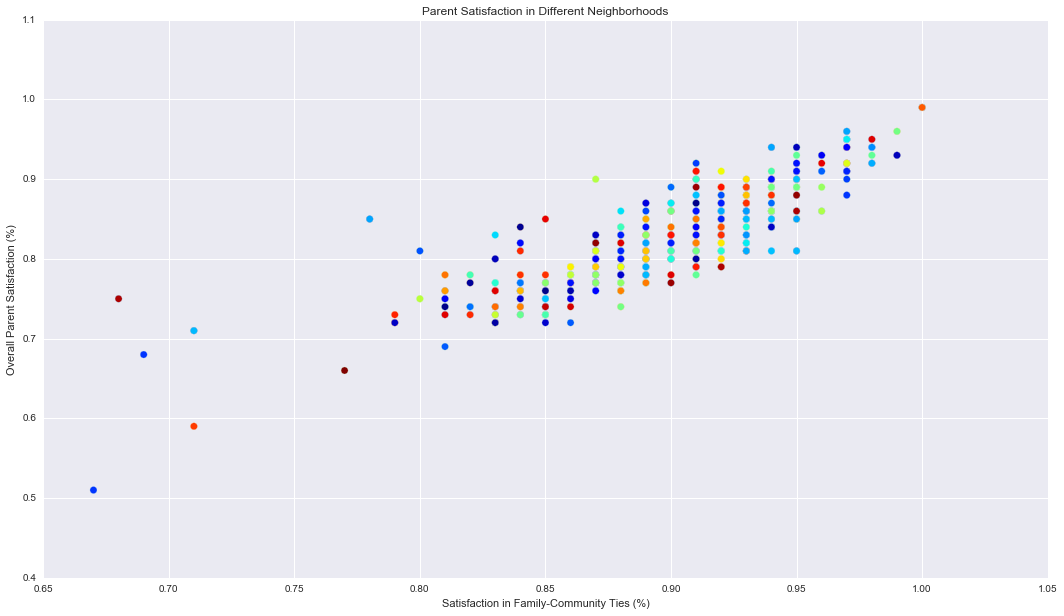

In [100]:
schoolsN['BoroughNum'] = pd.Categorical(schoolsN["Borough"]).labels

plt.scatter(schoolsN['ParentPS'],schoolsN['FamCommunity_Ties'],c=schoolsN['BoroughNum'], s=50, cmap='jet');
plt.xlabel('Satisfaction in Family-Community Ties (%)');
plt.ylabel('Overall Parent Satisfaction (%)');
plt.title('Parent Satisfaction in Different Boroughs')

model = sm.ols(formula="ParentPS ~ School_Leadership + Trust + FamCommunity_Ties + BoroughNum",
               data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n') 

schoolsN['NeighNum'] = pd.Categorical(schoolsN["Neighborhood"]).labels

plt.scatter(schoolsN['ParentPS'],schoolsN['FamCommunity_Ties'],c=schoolsN['NeighNum'], s=50, cmap='jet');
plt.xlabel('Satisfaction in Family-Community Ties (%)');
plt.ylabel('Overall Parent Satisfaction (%)');
plt.title('Parent Satisfaction in Different Neighborhoods')

model = sm.ols(formula="ParentPS ~ School_Leadership + Trust + FamCommunity_Ties + NeighNum",
               data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')      

In [95]:
model = sm.ols(formula="StudentPS ~ Supportive_Envment", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="StudentPS ~ Rig_Instruction + Supportive_Envment", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="StudentPS ~ PerStudentsSafe + Supportive_Envment", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="StudentPS ~ Trust + Supportive_Envment", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="StudentPS ~ Collab_Teachers + Supportive_Envment", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="StudentPS ~ Rig_Instruction + PerStudentsSafe + Trust + Collab_Teachers + Supportive_Envment", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

model = sm.ols(formula="StudentPS ~ Trust + Collab_Teachers + Supportive_Envment", data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')

StudentPS ~ Supportive_Envment R-squared: 0.959532570889
P-values: 
Intercept              5.602917e-43
Supportive_Envment    8.707633e-306
dtype: float64

StudentPS ~ Rig_Instruction + Supportive_Envment R-squared: 0.966926985108
P-values: 
Intercept              5.479293e-62
Rig_Instruction        7.714130e-21
Supportive_Envment    2.485677e-270
dtype: float64

StudentPS ~ PerStudentsSafe + Supportive_Envment R-squared: 0.959551601147
P-values: 
Intercept              1.074344e-32
PerStudentsSafe        6.512111e-01
Supportive_Envment    2.253264e-258
dtype: float64

StudentPS ~ Trust + Supportive_Envment R-squared: 0.962257733268
P-values: 
Intercept              8.329509e-38
Trust                  3.716201e-08
Supportive_Envment    1.051471e-268
dtype: float64

StudentPS ~ Collab_Teachers + Supportive_Envment R-squared: 0.973191589757
P-values: 
Intercept              4.124422e-77
Collab_Teachers        8.314655e-41
Supportive_Envment    2.538798e-316
dtype: float64

StudentPS ~ Ri

StudentPS ~ Trust + Collab_Teachers + Supportive_Envment + BoroughNum R-squared: 0.97651029872
P-values: 
Intercept              5.030324e-17
Trust                  7.458673e-11
Collab_Teachers        3.086318e-44
Supportive_Envment    1.166692e-309
BoroughNum             1.253514e-03
dtype: float64

StudentPS ~ Trust + Collab_Teachers + Supportive_Envment + NeighNum R-squared: 0.976087949947
P-values: 
Intercept              3.338697e-15
Trust                  3.950535e-12
Collab_Teachers        8.158872e-45
Supportive_Envment    5.164778e-310
NeighNum               1.001980e-01
dtype: float64



C:\Users\u0841520\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: 'labels' is deprecated. Use 'codes' instead


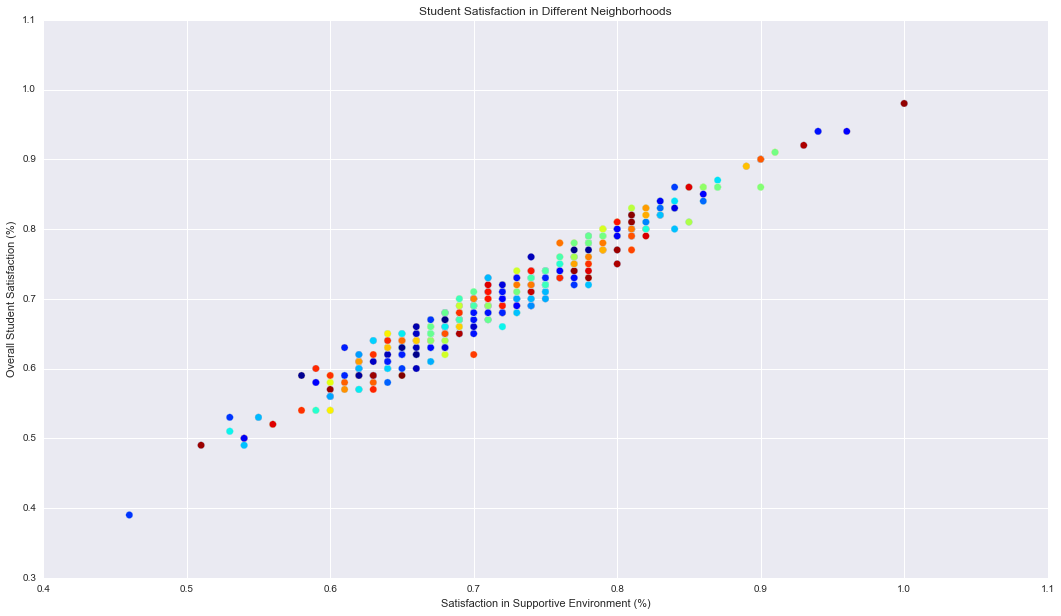

In [101]:
plt.scatter(schoolsN['StudentPS'],schoolsN['Supportive_Envment'],c=schoolsN['BoroughNum'], s=50, cmap='jet');
plt.xlabel('Satisfaction in Supportive Environment (%)');
plt.ylabel('Overall Student Satisfaction (%)');
plt.title('Student Satisfaction in Different Boroughs')

model = sm.ols(formula="StudentPS ~ Trust + Collab_Teachers + Supportive_Envment + BoroughNum",data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n') 

schoolsN['NeighNum'] = pd.Categorical(schoolsN["Neighborhood"]).labels

plt.scatter(schoolsN['StudentPS'],schoolsN['Supportive_Envment'],c=schoolsN['NeighNum'], s=50, cmap='jet');
plt.xlabel('Satisfaction in Supportive Environment (%)');
plt.ylabel('Overall Student Satisfaction (%)');
plt.title('Student Satisfaction in Different Neighborhoods')

model = sm.ols(formula="StudentPS ~ Trust + Collab_Teachers + Supportive_Envment + NeighNum",data=schoolsN)
model_result = model.fit()
print(str(model.formula) + ' R-squared: ' + str(model_result.rsquared))
print('P-values: \n' + str(model_result.pvalues) + '\n')      

1) Decision Tree for guessing which schools will have a larger gap between Parent and Student PS? 
2) Determine which is more important to parents: Attendace Rate or Graduation Rate? 
3) Estimate the student/parent PS based on some various factors? 
4) Cluster schools into groups that scored high in different categories - are there similarities within clusters? 
    **PVC clustering 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
sns.set()

#Groupby Neighborhood in order to filter out groups smaller than 3
schoolsHood = schoolsN.groupby(['Neighborhood']).filter(lambda g: len(g) >= 3)

#Make df grouped by Neighboorhood (only Neighbors w/ >= 3 schools)
schools_ByHood = schoolsHood.groupby(['Neighborhood']).mean()

# Make df grouped by Borough
schools_ByBorough = schoolsHood.groupby(['Borough']).mean()

In [ ]:
#bp_cols_demog = ['% Female','% Male', '% Asian', '% Black', 
 #          '% Hispanic', '% Other', '% White','% Students with Disabilities', '% Poverty']
schoolsN['Majority'] = schoolsN[['% Asian','% Black','% Hispanic','% Other','% White']].idxmax(axis=1)

for row_index, row in schoolsN.iterrows():
    coln = row['Majority']
    val = schoolsN.loc[row_index,coln]
    schoolsN.loc[row_index,'% Majority'] = val

schoolsN.head()
#schools_ByBorough = schoolsN.groupby(['Borough']).count()
dfplt = schoolsN[['Borough','Majority']]
dfplt2 = pd.pivot_table(dfplt2,index = ['Borough'])
#dfplt2 = dfplt2['Majority']
dfplt2.plot.bar()
plt.show()